# 10.2.1: Intro to Machine Learning (Part 1)

###### 

##### Instructions. Use the dataset to perform a regression prediction using scikit-learn, as demonstrated in the lectures. You should split the data into test/train sets, train the model (output/comment the scores), cross validate the model (output/comment the scores), and predict using the test set (output/comment the scores and actual accuracy).

##### Research Question: TEST how each factor (i.e. direction) impacts selling price: (1) Year (Year Bought [1992-2020]) / (2) Km Driven / (3) Engine / (4) Mileage / (5) MaxPower (Remove Categorical Columns for simplicity)

In [1]:
# Some Information about the Data:
# To be used for both classification and regression (Will transform a variable)
# (1) Source: Kaggle Vehicle Data Set (From Dekho) by Nehal Birla
# (2) Potential Dependent Variables: Selling Price, Selling Price Greater than USD 500,000
# (3) Potential Independent Variables (More than 3): Year (Year Bought [1992-2020]), Km Driven, Engine, Mileage, MaxPower (Remove Categorical Columns for simplicity)
# (4) Rows: 8,129

In [2]:
# Import packages for Winsorization
import scipy.stats.mstats
import matplotlib.pyplot as plt # multiple plots

# Read CSV File
import pandas as pd

carData = pd.read_csv('Car details v3.csv')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### I. Data Cleaning (STEP 1)

#### * Other Steps

In [3]:
# Other Step: Remove units (mileage (kmpl), engine (CC), max_power (bhp)
# carData['mileage'] = carData['mileage'].map(lambda x: x.rstrip(' kmpl')) won't work with float?
# carData['mileage'] = carData['mileage'].map(lambda x: x*2) # concatenate
carData['mileage'] = carData['mileage'].str.rstrip('km/kg kmpl') # don't forget km/kg
# carData.mileage.unique()
carData['mileage'] = pd.to_numeric(carData['mileage'], downcast='float')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
# Other Step: Remove units (mileage (kmpl), engine (CC), max_power (bhp)
# carData['mileage'] = carData['mileage'].map(lambda x: x.rstrip(' kmpl')) won't work with float?
# carData['mileage'] = carData['mileage'].map(lambda x: x*2) # concatenate
carData['engine'] = carData['engine'].str.rstrip(' CC')
carData['engine'] = pd.to_numeric(carData['engine'], downcast='float')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
# Other Step: Remove units (mileage (kmpl), engine (CC), max_power (bhp)
# carData['mileage'] = carData['mileage'].map(lambda x: x.rstrip(' kmpl')) won't work with float?
# carData['mileage'] = carData['mileage'].map(lambda x: x*2) # concatenate
carData['max_power'] = carData['max_power'].str.rstrip(' bhp')
carData['max_power'] = pd.to_numeric(carData['max_power'], downcast='float')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,140Nm@ 1800-3000rpm,5.0


In [6]:
# Rename Columns (For Clarity/Neatness)
carData.columns = ['Car Name', 'Year Bought', 'Selling Price', 'KM Driven', 'Fuel Type', 'Seller Type', 'Transmission', 'Nth Owner', 'Mileage (km/litr)', 'Engine (cc)', 'Max Power (bhp)', 'Torque', 'N-Seater']
carData

,Car Name,Year Bought,Selling Price,KM Driven,Fuel Type,Seller Type,Transmission,Nth Owner,Mileage (km/litr),Engine (cc),Max Power (bhp),Torque,N-Seater
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,140Nm@ 1800-3000rpm,5.0


#### a. Drop Nulls

In [7]:
carData.dropna(inplace=True) # how=any, all, axis, thresh, inplace
carData # Lose 222 Observations

,Car Name,Year Bought,Selling Price,KM Driven,Fuel Type,Seller Type,Transmission,Nth Owner,Mileage (km/litr),Engine (cc),Max Power (bhp),Torque,N-Seater
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,140Nm@ 1800-3000rpm,5.0


#### b. Remove irrelevant columns

In [8]:
carData.drop(['Torque', 'Fuel Type', 'Seller Type', 'Transmission', 'Nth Owner', 'N-Seater'], axis = 1, inplace = True)
carData

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000
8125,Maruti Swift Dzire ZDi,2009,382000,120000,19.299999,1248.0,73.900002
8126,Tata Indigo CR4,2013,290000,25000,23.570000,1396.0,70.000000


#### e. Remove duplicates

In [9]:
# Remove Duplicates here in the data set that is about to be the final one:
## I noticed one entry to be a duplicate:
##  8126	Tata Indigo CR4	2013	290000	25000	23.57	1396	70
##  8127	Tata Indigo CR4	2013	290000	25000	23.57	1396	70

carData.drop_duplicates(inplace = True)
carData # Shed 1197 observations

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


### II. Regression Prediction (STEP 2)

#### EXPLORATORY DATA ANALYSIS: Other Adjustments + Preliminary Charting

In [10]:
# Recall -- Verdict: Be sure to WINSORIZE the following
# (1) Mileage [0 value] 
# (2) KM Driven [1 km / 2m km]
# (3) Selling Value [Some really high selling values of (1.2m and absurdly low sales of 30k)]

In [11]:
# Decision Rule: If it looks normal, don't clean anymore.

In [12]:
############## Quick Scatter Plots ##############

<AxesSubplot:xlabel='Max Power (bhp)', ylabel='Selling Price'>

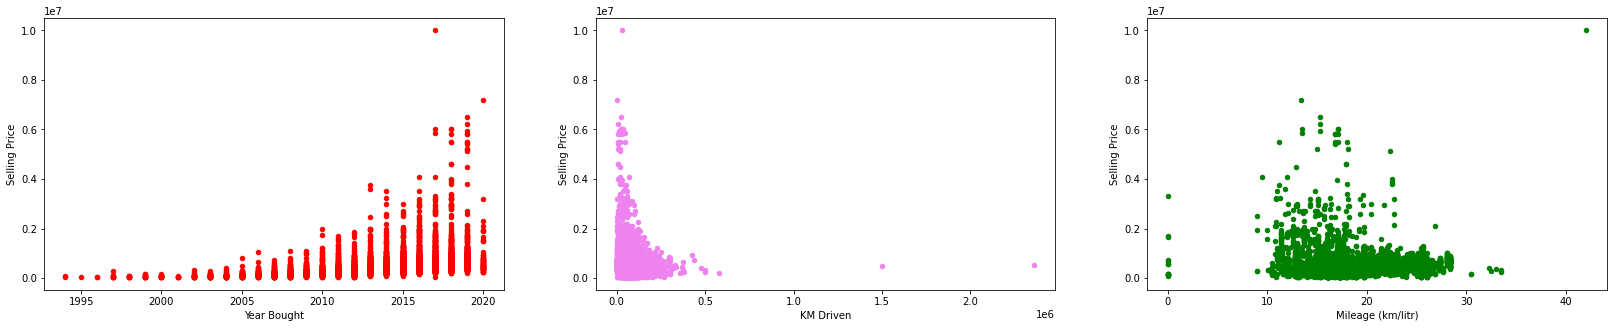

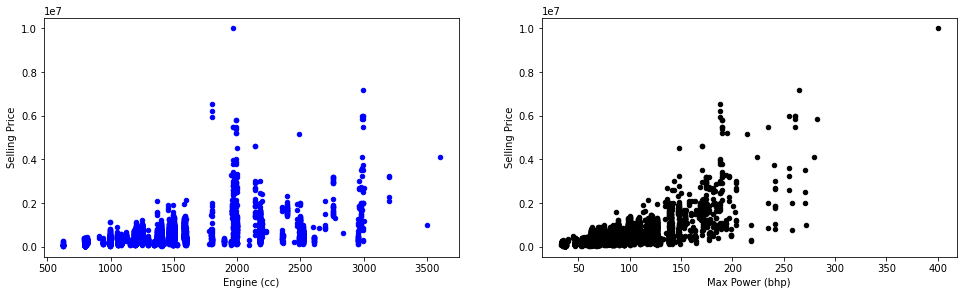

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

carData.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
carData.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
carData.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
carData.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
carData.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [14]:
# Verdict: Year Bought, Max Power and Engine don't seem to be too continuous, but since this is just a practice regression this will have to do.
# Result looks LOGICAL (e.g. earlier bought, higher selling price, etc.)

In [15]:
############## Mileage ##############

In [16]:
# Winsorize Mileage:
carDataWinsorized = carData.copy()
carDataWinsorized["Mileage (km/litr)"] = scipy.stats.mstats.winsorize(carDataWinsorized["Mileage (km/litr)"], [.05, .05])

carDataWinsorized

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


In [17]:
# REMOVE OUTLIERS:
valMin = carData["Mileage (km/litr)"].quantile(0.05)
valMax = carData["Mileage (km/litr)"].quantile(0.95)
carDataNoOutliers = carData[carData["Mileage (km/litr)"].between(valMin, valMax)]

carDataNoOutliers

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


<AxesSubplot:xlabel='Mileage (km/litr)', ylabel='Selling Price'>

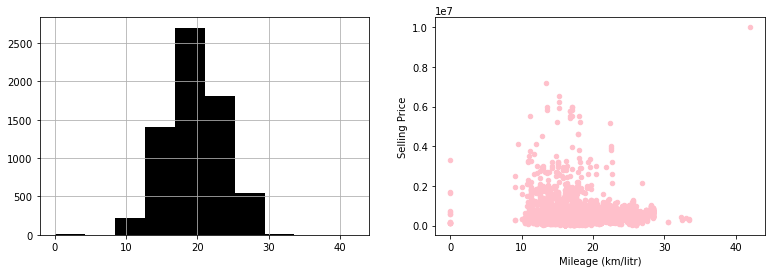

In [18]:
# Chart to see difference: (unwinsorized)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carData["Mileage (km/litr)"].hist(bins=10, color='black', ax=axes[0])
carData.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', color='pink', ax=axes[1]) # Outlier isn't doing much to affect what looks like a downtrend

<AxesSubplot:xlabel='Mileage (km/litr)', ylabel='Selling Price'>

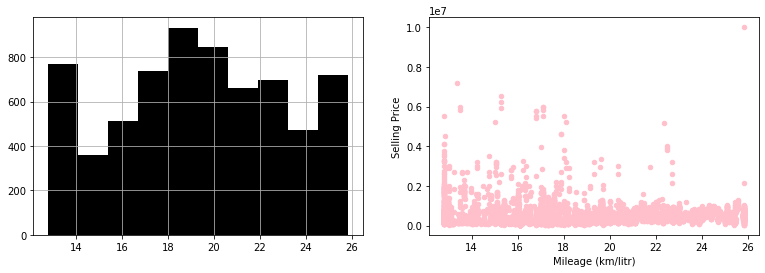

In [19]:
# Chart to see difference: (winsorized)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataWinsorized["Mileage (km/litr)"].hist(bins=10, color='black', ax=axes[0])
carDataWinsorized.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:xlabel='Mileage (km/litr)', ylabel='Selling Price'>

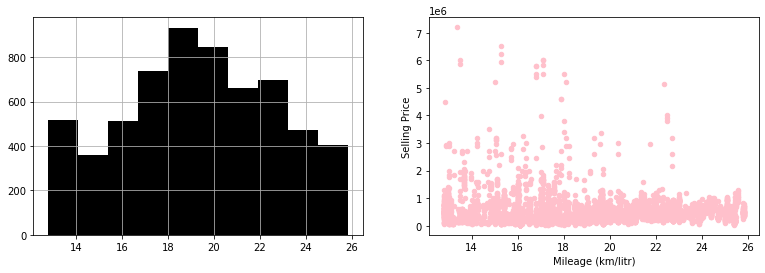

In [20]:
# Chart to see difference: (Removed)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataNoOutliers["Mileage (km/litr)"].hist(bins=10, color='black', ax=axes[0])
carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:xlabel='Max Power (bhp)', ylabel='Selling Price'>

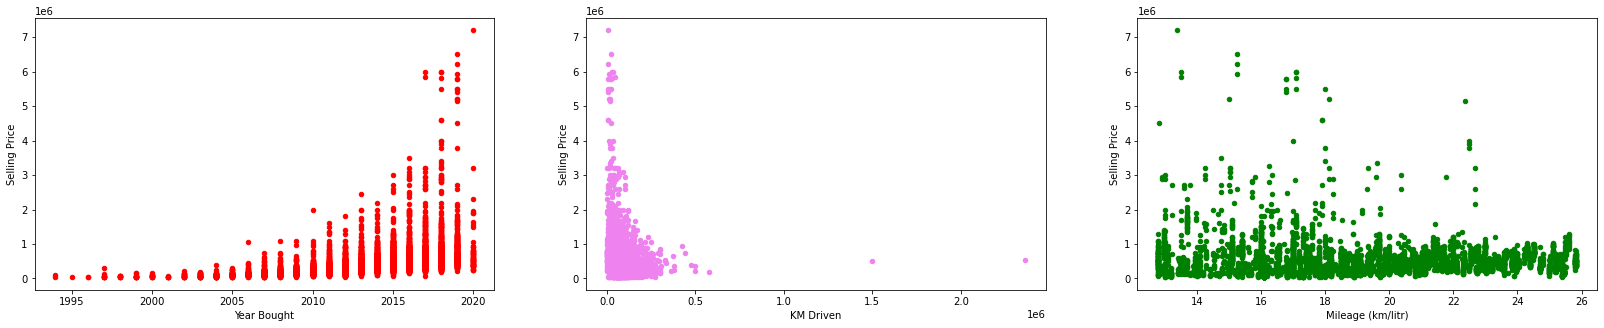

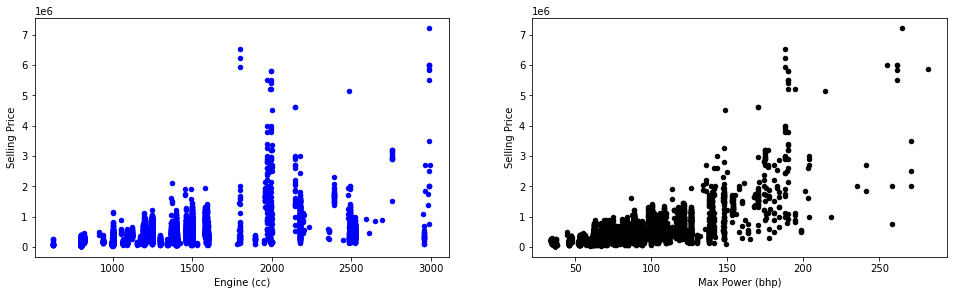

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [22]:
# Effect of clean up: Scatterplots look a bit more better distributed but the results are still the same. 
# DECISION: I decide not to transform the data anymore and stick with what I have because the outliers, once removed, appear not to have much impact to the existing relationship.

In [23]:
############## KM Driven ##############

In [24]:
# Winsorize KM Driven:
carDataWinsorized = carData.copy()
carDataWinsorized["KM Driven"] = scipy.stats.mstats.winsorize(carDataWinsorized["KM Driven"], [.05, .05])

carDataWinsorized

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


In [25]:
# REMOVE OUTLIERS:
valMin = carData["KM Driven"].quantile(0.05)
valMax = carData["KM Driven"].quantile(0.95)
carDataNoOutliers = carData[carData["KM Driven"].between(valMin, valMax)]

carDataNoOutliers

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


<AxesSubplot:xlabel='KM Driven', ylabel='Selling Price'>

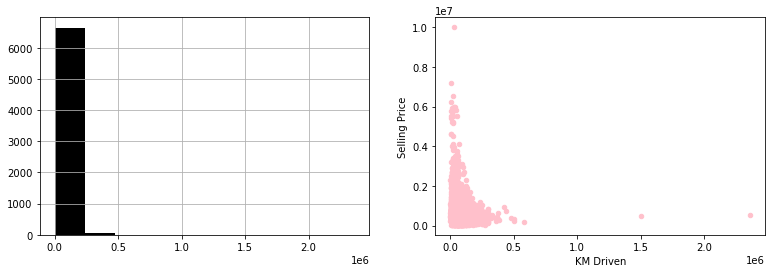

In [26]:
# Chart to see difference: (unwinsorized)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carData["KM Driven"].hist(bins=10, color='black', ax=axes[0])
carData.plot('KM Driven', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:xlabel='KM Driven', ylabel='Selling Price'>

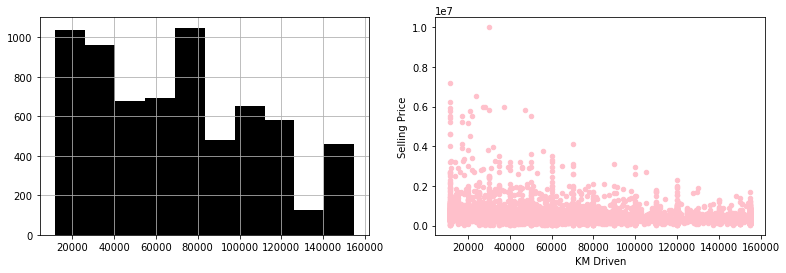

In [27]:
# Chart to see difference: (winsorized)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataWinsorized["KM Driven"].hist(bins=10, color='black', ax=axes[0])
carDataWinsorized.plot('KM Driven', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:xlabel='KM Driven', ylabel='Selling Price'>

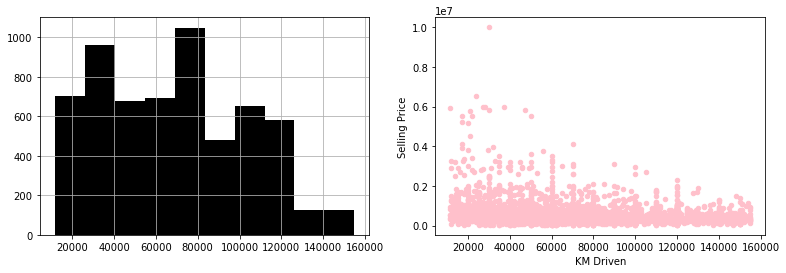

In [28]:
# Chart to see difference: (Removed)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataNoOutliers["KM Driven"].hist(bins=10, color='black', ax=axes[0])
carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:xlabel='Max Power (bhp)', ylabel='Selling Price'>

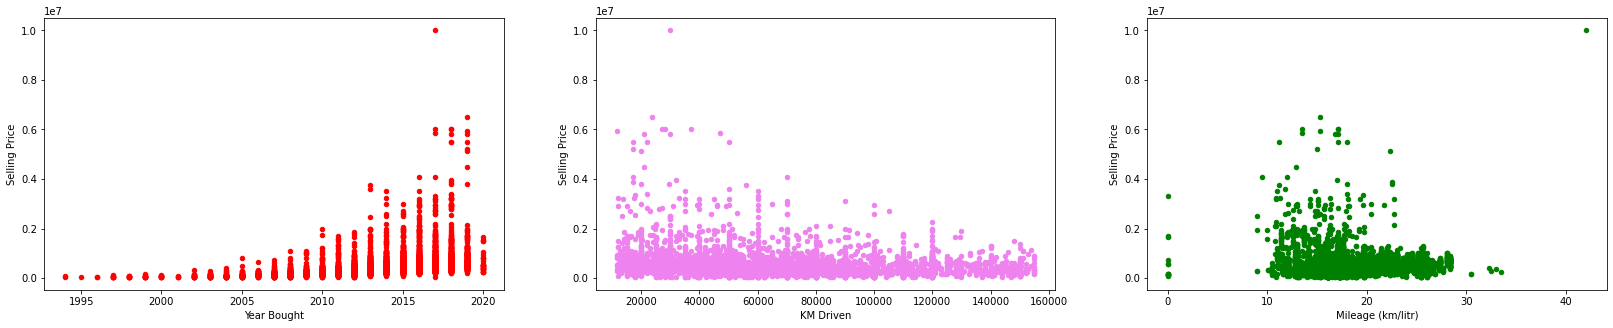

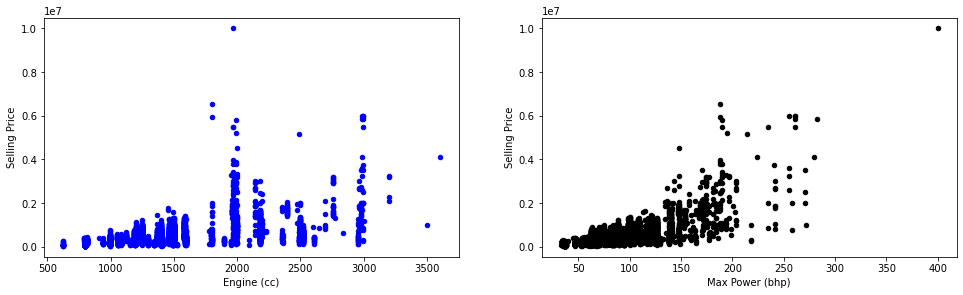

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [30]:
# Effect of clean up: Relationships remain the same. FLATTER relationship between KM (Removing 1km and 2km outliers were a big deal) and Selling Price.
# DECISION: MAKE THIS CHANGE FOR THE FINAL RUNS.

In [31]:
############## Selling Price ##############

In [32]:
# Winsorize Selling Price:
carDataWinsorized = carData.copy()
carDataWinsorized["Selling Price"] = scipy.stats.mstats.winsorize(carDataWinsorized["Selling Price"], [.05, .05])

carDataWinsorized

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


In [33]:
# REMOVE OUTLIERS:
valMin = carData["Selling Price"].quantile(0.05)
valMax = carData["Selling Price"].quantile(0.95)
carDataNoOutliers = carData[carData["Selling Price"].between(valMin, valMax)]

carDataNoOutliers

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


<AxesSubplot:>

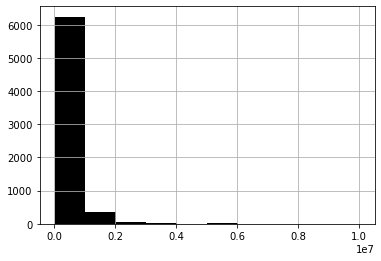

In [34]:
# Chart to see difference: (unwinsorized)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
carData["Selling Price"].hist(bins=10, color='black')
# carData.plot('Selling Price', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:>

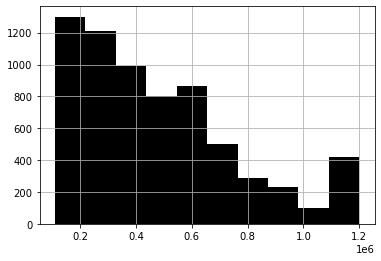

In [35]:
# Chart to see difference: (winsorized)
carDataWinsorized["Selling Price"].hist(bins=10, color='black')
# carDataWinsorized.plot('Selling Price', 'Selling Price', kind='scatter', color='pink', ax=axes[1]) # Obviously slope = 1

<AxesSubplot:>

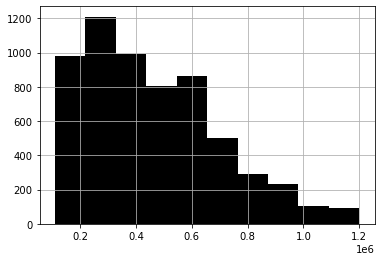

In [36]:
# Chart to see difference: (Removed)
carDataNoOutliers["Selling Price"].hist(bins=10, color='black')
# carDataNoOutliers.plot('Selling Price', 'Selling Price', kind='scatter', color='pink', ax=axes[1]) # Obviously slope = 1

<AxesSubplot:xlabel='Max Power (bhp)', ylabel='Selling Price'>

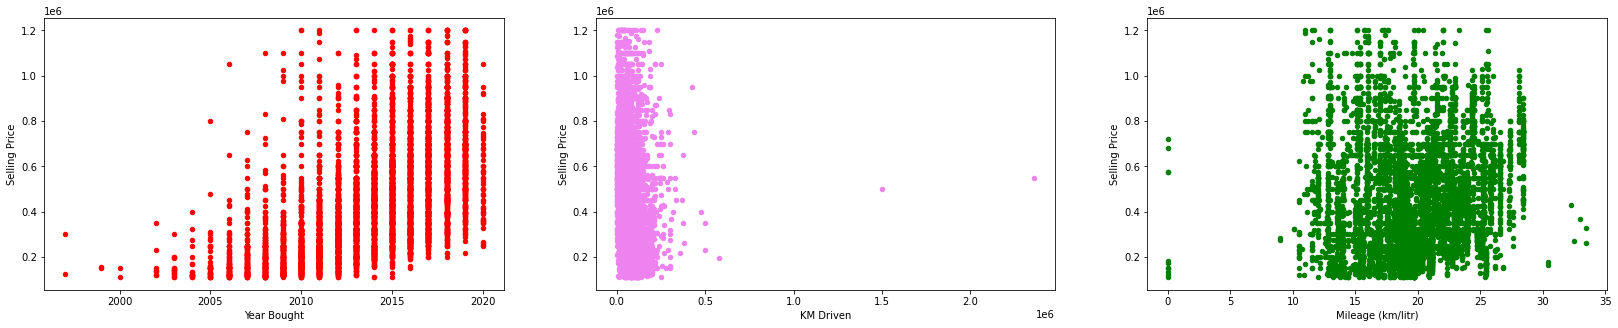

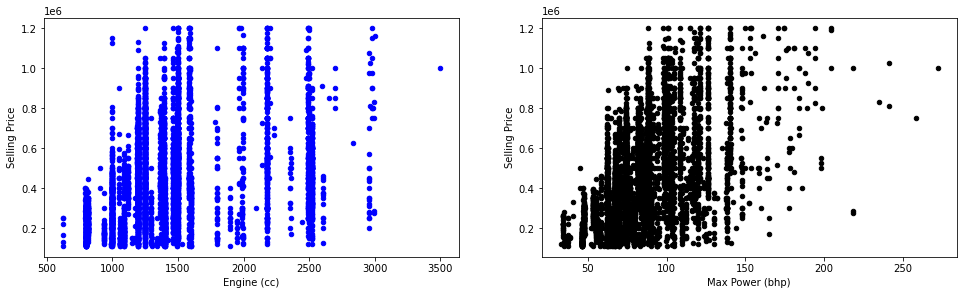

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [38]:
# Effect of clean up: Relationships less apparent for some factors (e.g. KM Driven and Mileage). It would be wise to do a regression on the data after transforming in the ff. order:
# DECISION: Remove observations for SELLING PRICE -> KM Driven -> Mileage
# LOGIC for order: Changing Selling Price has the most impact, KM Driven has the worst range of values (1, 2million), Mileage.

# PREFERENCE: Remove observations because we have enough observations anyway

### Regression Prediction

In [39]:
# Final Data
# REMOVE OUTLIERS for Selling Price:
valMin = carData["Selling Price"].quantile(0.05)
valMax = carData["Selling Price"].quantile(0.95)
carDataNoOutliers = carData[carData["Selling Price"].between(valMin, valMax)]

carDataNoOutliers

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


In [40]:
# REMOVE OUTLIERS for KM Driven:
valMin = carDataNoOutliers["KM Driven"].quantile(0.05)
valMax = carDataNoOutliers["KM Driven"].quantile(0.95)
carDataNoOutliers = carDataNoOutliers[carDataNoOutliers["KM Driven"].between(valMin, valMax)]

carDataNoOutliers

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


In [41]:
# REMOVE OUTLIERS for Mileage (km/litr):
valMin = carDataNoOutliers["Mileage (km/litr)"].quantile(0.05)
valMax = carDataNoOutliers["Mileage (km/litr)"].quantile(0.95)
carDataNoOutliers = carDataNoOutliers[carDataNoOutliers["Mileage (km/litr)"].between(valMin, valMax)]

carDataNoOutliers #

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


In [42]:
# Result: From 6709 Obs to 4916. A bit costly (1800 Obs Omitted)

In [43]:
# Final Data Scatter

<AxesSubplot:xlabel='Max Power (bhp)', ylabel='Selling Price'>

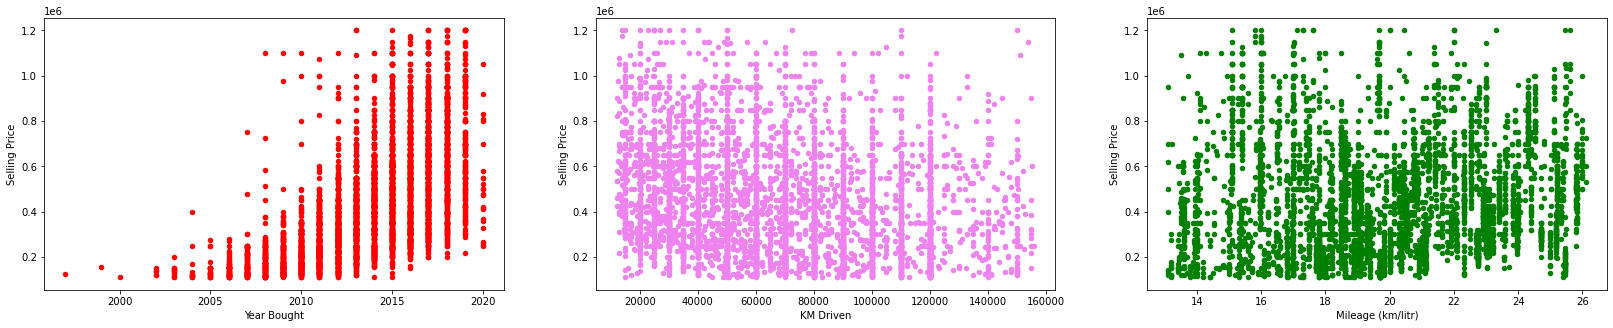

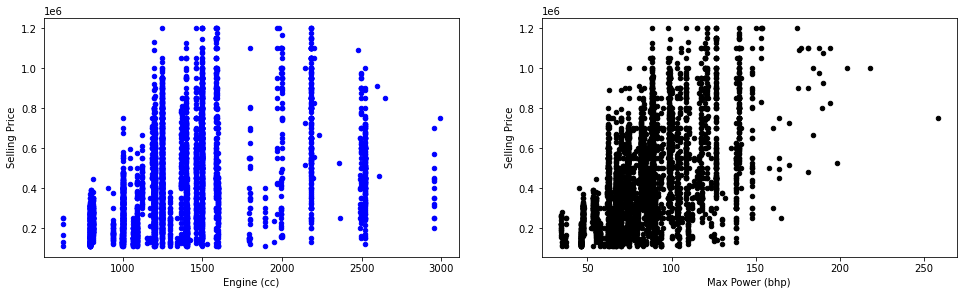

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [45]:
# Data looks cleaner and ready to regress.
# Prediction results won't be as reliable given apparent categoricalness in the data as can be seen after the final transformations.
# A bit concerned that Mileage may have a positive relationship with selling price if we do a one-to-one regression.

# Might be better to resample and bootstrap but I choose to preserve the data integrity for simplicity.

### Scikit Learn

In [46]:
# Summary Statistics:
carDataNoOutliers.describe()

,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
count,4916.000000,4.916000e+03,4916.000000,4916.000000,4916.000000,4916.000000
mean,2013.846013,4.429806e+05,68465.856794,19.942032,1355.394165,83.821350
std,3.248051,2.372914e+05,34337.578769,3.164252,398.876129,23.697851
min,1997.000000,1.100000e+05,12000.000000,13.100000,624.000000,34.200001
25%,2012.000000,2.500000e+05,40000.000000,17.700001,1197.000000,67.099998
50%,2014.000000,4.000000e+05,67000.000000,20.000000,1248.000000,81.815002
75%,2016.000000,6.000000e+05,92537.750000,22.540001,1497.000000,93.699997
max,2020.000000,1.200000e+06,156040.000000,26.100000,2993.000000,258.000000


In [47]:
# Regression:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, r2_score
from sklearn.linear_model import LinearRegression

num_cols = ['Year Bought', 'KM Driven', 'Mileage (km/litr)', 'Engine (cc)', 'Max Power (bhp)']
cat_cols = []

# Pipeline of transforms with a final estimator.
# Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.
# The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()) # Standardize (The transform)
    ])

# A ONE HOT ENCODING is a representation of categorical variables as binary vectors [1,0].
# This first requires that the categorical values be mapped to integer values.
# Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
pipeline = ColumnTransformer([ # Applies transformers to columns of an array or pandas DataFrame.
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

all_x_cols = num_cols + cat_cols # a join
y_col = ['Selling Price']

forest_rgr = LinearRegression()

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(carDataNoOutliers[all_x_cols], carDataNoOutliers[y_col], test_size=0.33)

In [49]:
# Train!

X_train_xformed = pipeline.fit_transform(X_train) # transform using mean and variance of TRAINING data
X_test_xformed = pipeline.transform(X_test) # transform using mean and variance of TEST data

forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel()) # Regression Object (takes in X and Y)

In [50]:
# Predict!

print('Train Scores')
train_pred = forest_rgr.predict(X_train_xformed)

print(f'R2: {r2_score(y_train.values.ravel(), train_pred)}')

print('\nTest Scores')
test_pred = forest_rgr.predict(X_test_xformed)

print(f'R2: {r2_score(y_test.values.ravel(), test_pred)}')

Train Scores
R2: 0.6927616029826442

Test Scores
R2: 0.7078783906366097


In [51]:
x_data = pipeline.fit_transform(carDataNoOutliers[all_x_cols])
y_data = carDataNoOutliers[y_col]
    
cross_pred = cross_val_predict(forest_rgr, x_data, y_data.values.ravel(), cv=2000)

print(f'R2: {r2_score(y_data.values.ravel(), cross_pred)}')

R2: 0.6968701139964533


In [52]:
predictData = pd.DataFrame({'Year Bought':[2015], 'KM Driven':[100000], 'Mileage (km/litr)':[20], 'Engine (cc)':[2000], 'Max Power (bhp)':[100]})
display(predictData)

print(f'Selling Price: USD {forest_rgr.predict(pipeline.transform(predictData))[0]:,.2f}')

# Results (Adjust all inputs):
# (1) Increase 'KM Driven' by 100,000 to 200,000: USD 574,447.19 (Inline with expectations that more used cars get priced LOWER)
# (2) Increase 'Year Bought' by 1 to 2016: USD 672,460.22 (Inline with expectations that younger cars get priced higher)
# (3) Increase 'Mileage (km/litr)' or Efficiency to 25: USD 665,280.02 (Inline with expectations that more efficient cars / better mileage get priced higher regardless of condition)
# (4) Increase 'Engine (cc)' to 3000: USD 773,870.79: Inline with expectations that better engine = better price
# (5) Increase 'Max Power (bhp)' to 110: USD 675,416.46: Inline with expectations that better power = better price.

# And all of these are statistically significant with R-squared = 69%.

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,2015,100000,20,2000,100


Selling Price: USD 631,212.68


### Extra Section: Using Bootstrapped Data:

In [53]:
def bootstrapper(nBs, dataset):
    '''
    Input (1) Number of Bootstraps and (2) Dataset name, and the function will bootstrap the dataset for the given number of bootstraps
    '''
    
    bs = dataset.sample(n=len(dataset)*nBs, replace=True, axis=0).reset_index().drop('index', axis=1)
    bs['nBs'] = (bs.index/len(dataset)).astype(int)
    return bs

In [54]:
bs = bootstrapper(2000, carData) # Computer unable to handle anymore
bs

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),nBs
0,Maruti Vitara Brezza VDi Option,2016,610000,110000,24.299999,1248.0,88.500000,0
1,Maruti Ritz VDi,2012,335000,72072,21.100000,1248.0,73.900002,0
2,Chevrolet Tavera Neo 3 LT 9 Seats BSIII,2014,600000,90000,13.580000,2499.0,72.400002,0
3,Mahindra Scorpio S2 9 Seater,2015,720000,90000,15.400000,2523.0,75.000000,0
4,Maruti Wagon R LXI BSIII,2012,220000,60000,18.900000,998.0,67.099998,0
...,...,...,...,...,...,...,...,...
13417995,Hyundai i10 Sportz 1.1L,2015,360000,20000,19.809999,1086.0,68.050003,1999
13417996,Mahindra Scorpio LX,2013,484999,120000,12.050000,2179.0,120.000000,1999
13417997,Honda Amaze VX i-DTEC,2014,530000,110000,25.799999,1498.0,98.599998,1999
13417998,Chevrolet Beat LS,2013,170000,70000,18.600000,1199.0,79.400002,1999


In [55]:
# Create Bootstrapped Data Frame
bsData = pd.DataFrame(dtype=float)
# bsData['Year Bought'] = bs.groupby('nBs').mean()['Year Bought'].round() # Mean value = bootstrap value for each observation
bsData['Selling Price'] = bs.groupby('nBs').mean()['Selling Price'] # Mean value = bootstrap value for each observation
bsData['KM Driven'] = bs.groupby('nBs').mean()['KM Driven'] # Mean value = bootstrap value for each observation
bsData['Mileage (km/litr)'] = bs.groupby('nBs').mean()['Mileage (km/litr)'] # Mean value = bootstrap value for each observation
bsData['Engine (cc)'] = bs.groupby('nBs').mean()['Engine (cc)'] # Mean value = bootstrap value for each observation
bsData['Max Power (bhp)'] = bs.groupby('nBs').mean()['Max Power (bhp)'] # Mean value = bootstrap value for each observation

bsData = bsData.reset_index() # Remove Year Bought as no variation is available (mainly 2014)
del bsData['nBs'] # Delete this extra column set
bsData

,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,523365.008347,73544.924877,19.469778,1438.989746,87.517662
1,527838.067968,72925.381279,19.422136,1431.860352,87.993958
2,521295.268147,72875.284692,19.446747,1423.712036,87.570190
3,523127.411537,72483.588165,19.454687,1428.470093,87.603897
4,530820.576092,74559.067074,19.479391,1433.535278,87.777710
...,...,...,...,...,...
1995,516084.016247,74081.102698,19.475609,1431.169312,87.178276
1996,527724.486958,73806.845581,19.456909,1433.105713,87.880470
1997,521421.873454,73258.168430,19.478968,1437.101074,87.543594
1998,534502.069757,72723.843494,19.505854,1430.544067,87.899338


In [56]:
# Summary Statistics:
bsData.describe()

,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,526445.451240,73410.117155,19.467220,1431.241577,87.767120
std,6218.079106,706.491109,0.048783,5.980830,0.381277
min,503997.816813,70931.383217,19.323175,1411.165405,86.519058
25%,521991.710724,72934.046542,19.434061,1427.312531,87.521366
50%,526636.019004,73379.480772,19.465185,1431.283875,87.777222
75%,530676.562118,73856.960054,19.501269,1435.133972,88.022722
max,547711.508123,75929.330154,19.644249,1450.768799,89.313324


<AxesSubplot:xlabel='Max Power (bhp)', ylabel='Selling Price'>

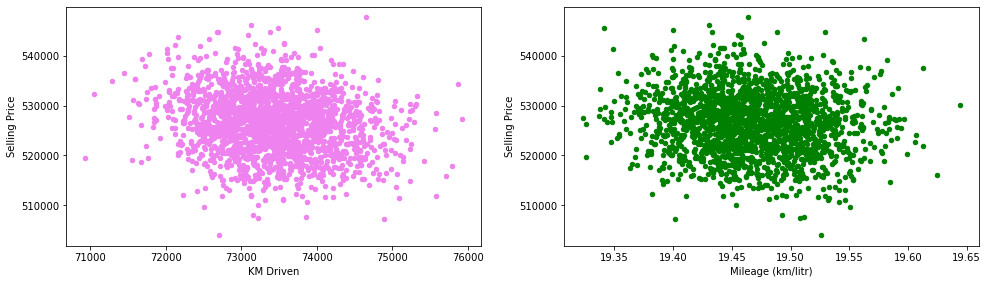

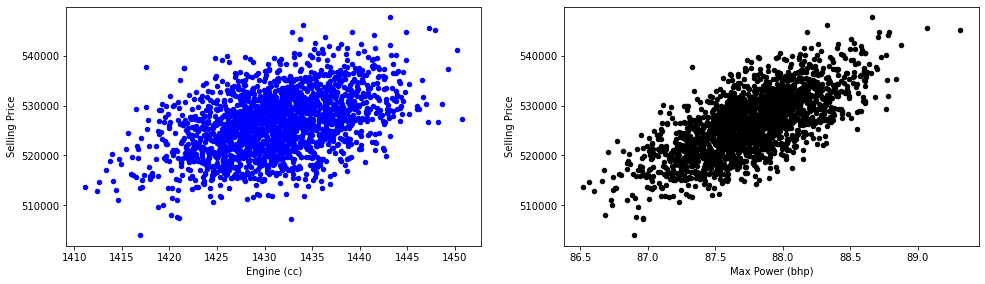

In [57]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))

# bsData.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
bsData.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[0], color='violet')
bsData.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[1], color='green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
bsData.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
bsData.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [58]:
num_cols = ['KM Driven', 'Mileage (km/litr)', 'Engine (cc)', 'Max Power (bhp)']
cat_cols = []

# Pipeline of transforms with a final estimator.
# Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.
# The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()) # Standardize (The transform)
    ])

# A ONE HOT ENCODING is a representation of categorical variables as binary vectors [1,0].
# This first requires that the categorical values be mapped to integer values.
# Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
pipeline = ColumnTransformer([ # Applies transformers to columns of an array or pandas DataFrame.
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

all_x_cols = num_cols + cat_cols # a join
y_col = ['Selling Price']

forest_rgr = LinearRegression()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bsData[all_x_cols], bsData[y_col], test_size=0.33)

In [60]:
# Train!

X_train_xformed = pipeline.fit_transform(X_train) # transform using mean and variance of TRAINING data
X_test_xformed = pipeline.transform(X_test) # transform using mean and variance of TEST data

forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel()) # Regression Object (takes in X and Y)

In [61]:
# Predict!

print('Train Scores')
train_pred = forest_rgr.predict(X_train_xformed)

print(f'R2: {r2_score(y_train.values.ravel(), train_pred)}')

print('\nTest Scores')
test_pred = forest_rgr.predict(X_test_xformed)

print(f'R2: {r2_score(y_test.values.ravel(), test_pred)}')

Train Scores
R2: 0.5395288987680009

Test Scores
R2: 0.5490384160539317


In [62]:
x_data = pipeline.fit_transform(bsData[all_x_cols])
y_data = bsData[y_col]
    
cross_pred = cross_val_predict(forest_rgr, x_data, y_data.values.ravel(), cv=2000)

print(f'R2: {r2_score(y_data.values.ravel(), cross_pred)}') # Data remains robust

R2: 0.5409265435842969


In [63]:
predictData = pd.DataFrame({'KM Driven':[100000], 'Mileage (km/litr)':[20], 'Engine (cc)':[2000], 'Max Power (bhp)':[100]})
display(predictData)

print(f'Selling Price: USD {forest_rgr.predict(pipeline.transform(predictData))[0]:,.2f}')

# Results (Adjust all inputs):
# (1) Increase 'KM Driven' by 100,000 to 200,000: USD 571,675.59 (Inline with expectations that more used cars get priced LOWER)
# (2) Increase 'Mileage (km/litr)' or Efficiency to 25: USD 850,621.32 (Inline with expectations that more efficient cars / better mileage get priced HIGHER regardless of condition)
# (3) Increase 'Engine (cc)' to 3000: USD 880,501.62: Inline with expectations that better engine = BETTER price
# (4) Increase 'Max Power (bhp)' to 110: USD 837,446.19: Inline with expectations that better power = BETTER price.

# And all of these are STILL statistically significant with R-squared = 54%.

,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,100000,20,2000,100


Selling Price: USD 696,686.27
